In [1]:
#coding:utf8
import os
from PIL import Image
from torch.utils import data
import numpy as np
from torchvision import  transforms as T
import matplotlib.pyplot as plt
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision.transforms import *
from torch.utils import data
from torchvision import transforms
from torchvision.models import vgg16,vgg19
import torch.nn as nn
import datetime
from torchsummary import summary

In [2]:
class DogCat(data.Dataset):
    def __init__(self,root,transforms=None,train=True,test=False):
        self.test = test
        imgs = [os.path.join(root,img) for img in os.listdir(root)] 
        # test1: data/test1/8973.jpg
        # train: data/train/cat.10004.jpg 
        if self.test:
            imgs = sorted(imgs,key=lambda x:int(x.split('.')[-2].split('\\')[-1]))
        else:
            imgs = sorted(imgs,key=lambda x:int(x.split('.')[-2]))  
        imgs_num = len(imgs)
        np.random.seed(100)
        self.imgs = imgs
        if transforms is None:
            if self.test or not train: 
                self.transforms = T.Compose([
                    T.CenterCrop(224),                            
                    T.ToTensor(),                
                    T.Normalize(mean = [0.485, 0.456, 0.406], 
                                     std = [0.229, 0.224, 0.225])
                    ]) 
            else :
                imgs = np.random.permutation(imgs)
                self.transforms = T.Compose([
                    T.CenterCrop(224),
                    T.RandomHorizontalFlip(),
                    T.ToTensor(),
                    T.Normalize(mean = [0.485, 0.456, 0.406], 
                                     std = [0.229, 0.224, 0.225])
                    ])  
    def __getitem__(self,index):
        '''
        一次返回一张图片的数据
        '''
        img_path = self.imgs[index]
        if self.test: label = int(self.imgs[index].split('.')[-2].split('\\')[-1])
        else: label = 1 if 'dog' in img_path.split('\\')[-1] else 0
        data = Image.open(img_path)
        data = self.transforms(data)
        return data, label    
    def __len__(self):
        return len(self.imgs)

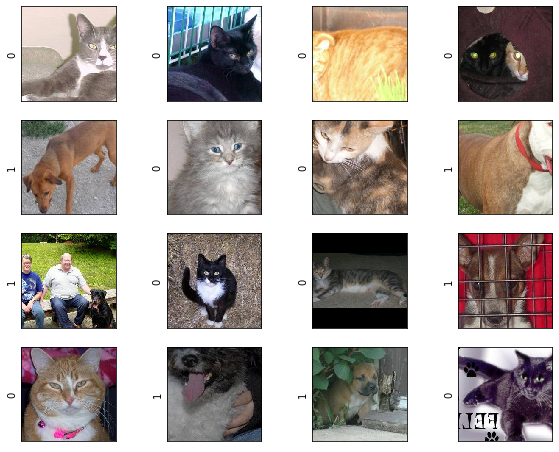

In [16]:
# 1=dog 0=cat
path = r'C:\Users\caeit\Desktop\binru7_1\train'
train_data = DogCat(path,train=True)
train_dataloader = DataLoader(train_data,batch_size=16,shuffle=True)
x,y = next(iter(train_dataloader))
mean = torch.Tensor([0.485, 0.456, 0.406])
std = torch.Tensor([0.229, 0.224, 0.225])

plt.figure(figsize=(10,8))
for j,i in enumerate(x):
    i = torch.transpose(i,2, 0)
    i = torch.transpose(i,0, 1)
    plt.subplot(4,4,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(y.data.numpy()[j])
    plt.imshow(i*std+mean)
    

In [21]:
model = vgg19(pretrained=True)
model = model.cuda()
summary(model,(3,224,224))

Downloading: "https://download.pytorch.org/models/vgg19-dcbb9e9d.pth" to C:\Users\caeit/.cache\torch\checkpoints\vgg19-dcbb9e9d.pth
28.8%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

38.2%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

45.0%IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_r

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [22]:
model.classifier[0] = nn.Linear(25088,512,bias=True)
model.classifier[3] = nn.Linear(512,256,bias=True)
model.classifier[4] = nn.Sigmoid()
model.classifier[6] = nn.Linear(in_features=256, out_features=2, bias=True)

In [23]:
model = model.cuda()
summary(model,(3,224,224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [24]:
cost = torch.nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.SGD(model.classifier.parameters(),lr=1e-4,momentum=0.9)

start = datetime.datetime.now()
for i in range(20):
        correct = 0.0
        total = 25000
        running_loss = 0.0
        accuracy = 0.0
        print('-----epoch', i+1, '-----')
        for num, image in enumerate(train_dataloader):
            x_train, y_train = image
            x_train = x_train.cuda()
            y_train = y_train.cuda()
            optimizer.zero_grad()
            output = model(x_train)
            loss = cost(output, y_train)
            _, predicted = torch.max(output, 1)
            correct += (predicted == y_train).sum().item()
            #print(correct)
            if num%100 == 0:
                print(num*16, '/ 25000', 'loss:', running_loss, ',accuracy:{}%'.format((100*correct/25000)),'correct:%s'%correct)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print('-----------Epoch:', i+1, ', one_epoch_loss:', running_loss, '-----------',',accuracy:%f'%(100*correct/25000))
print(datetime.datetime.now()-start)
torch.save(model, '../fine_tuning_20_epoch_dog_cat_vgg19.pkl')

-----epoch 1 -----
0 / 25000 loss: 0.0 ,accuracy:0.04% correct:10.0
1600 / 25000 loss: 67.98267048597336 ,accuracy:3.64% correct:910.0
3200 / 25000 loss: 128.77757900953293 ,accuracy:8.028% correct:2007.0
4800 / 25000 loss: 180.82106345891953 ,accuracy:13.2% correct:3300.0
6400 / 25000 loss: 223.632926851511 ,accuracy:18.94% correct:4735.0
8000 / 25000 loss: 260.7840358912945 ,accuracy:24.724% correct:6181.0
9600 / 25000 loss: 290.5343464463949 ,accuracy:30.74% correct:7685.0
11200 / 25000 loss: 317.53992219269276 ,accuracy:36.736% correct:9184.0
12800 / 25000 loss: 340.8308498263359 ,accuracy:42.74% correct:10685.0
14400 / 25000 loss: 360.0322105437517 ,accuracy:48.88% correct:12220.0
16000 / 25000 loss: 377.7570540904999 ,accuracy:54.996% correct:13749.0
17600 / 25000 loss: 394.3576249703765 ,accuracy:61.136% correct:15284.0
19200 / 25000 loss: 409.1863990202546 ,accuracy:67.252% correct:16813.0
20800 / 25000 loss: 422.5319748967886 ,accuracy:73.424% correct:18356.0
22400 / 25000 los

20800 / 25000 loss: 61.20209653675556 ,accuracy:81.776% correct:20444.0
22400 / 25000 loss: 65.80111755803227 ,accuracy:88.072% correct:22018.0
24000 / 25000 loss: 70.28181149810553 ,accuracy:94.356% correct:23589.0
-----------Epoch: 7 , one_epoch_loss: 72.85392851009965 ----------- ,accuracy:98.244000
-----epoch 8 -----
0 / 25000 loss: 0.0 ,accuracy:0.064% correct:16.0
1600 / 25000 loss: 5.434672111645341 ,accuracy:6.324% correct:1581.0
3200 / 25000 loss: 9.505400719121099 ,accuracy:12.632% correct:3158.0
4800 / 25000 loss: 15.040154760703444 ,accuracy:18.888% correct:4722.0
6400 / 25000 loss: 18.650209963321686 ,accuracy:25.188% correct:6297.0
8000 / 25000 loss: 22.924301424995065 ,accuracy:31.48% correct:7870.0
9600 / 25000 loss: 26.95685156621039 ,accuracy:37.78% correct:9445.0
11200 / 25000 loss: 31.104409845545888 ,accuracy:44.08% correct:11020.0
12800 / 25000 loss: 35.673616863787174 ,accuracy:50.36% correct:12590.0
14400 / 25000 loss: 39.945933582261205 ,accuracy:56.648% correc

12800 / 25000 loss: 28.912512004375458 ,accuracy:50.524% correct:12631.0
14400 / 25000 loss: 32.20779264345765 ,accuracy:56.844% correct:14211.0
16000 / 25000 loss: 34.99548556096852 ,accuracy:63.18% correct:15795.0
17600 / 25000 loss: 38.12728956155479 ,accuracy:69.512% correct:17378.0
19200 / 25000 loss: 42.30236539058387 ,accuracy:75.8% correct:18950.0
20800 / 25000 loss: 45.333445152267814 ,accuracy:82.144% correct:20536.0
22400 / 25000 loss: 49.04485036805272 ,accuracy:88.456% correct:22114.0
24000 / 25000 loss: 52.82758239097893 ,accuracy:94.772% correct:23693.0
-----------Epoch: 14 , one_epoch_loss: 55.02901785261929 ----------- ,accuracy:98.660000
-----epoch 15 -----
0 / 25000 loss: 0.0 ,accuracy:0.064% correct:16.0
1600 / 25000 loss: 3.13841918297112 ,accuracy:6.38% correct:1595.0
3200 / 25000 loss: 6.41329332254827 ,accuracy:12.704% correct:3176.0
4800 / 25000 loss: 10.942574044689536 ,accuracy:18.984% correct:4746.0
6400 / 25000 loss: 13.076008616015315 ,accuracy:25.332% cor

C:\Users\caeit\.conda\envs\pytorch_env\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type VGG. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\caeit\.conda\envs\pytorch_env\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\caeit\.conda\envs\pytorch_env\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
C:\Users\caeit\.conda\envs\pytorch_env\lib\site-packages\torch\serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ReLU. It won't be checked for correctness upon loading.
  "type " + o

# 测试

In [25]:
model = torch.load(r'C:\Users\caeit\Desktop\fine_tuning_20_epoch_dog_cat_vgg19.pkl')
model = model.cuda()

path = r'C:\Users\caeit\Desktop\binru7_1\test1'
test_data = DogCat(path,train=False,test=True)
test_dataloader = DataLoader(test_data,batch_size=16,shuffle=False,num_workers=0)

result = []
start = datetime.datetime.now()
for num, image in enumerate(test_dataloader):
    x_train, y_train = image
    x_train = x_train.cuda()
    y_train = y_train.cuda()

    output = model(x_train)

    _, predicted = torch.max(output, 1)
    result.append(predicted)
print(datetime.datetime.now()-start)
result1 = []
for i in result:
    i = i.cpu()
    for j in i.data.numpy():
        result1.append(j)


0:00:38.382334


In [37]:
for j,i in enumerate(result1):
    if i == 0:
        result1[j] = 0.05
    else:
        result1[j] = 0.95
np.savetxt("vgg19.csv", result1, delimiter=',')

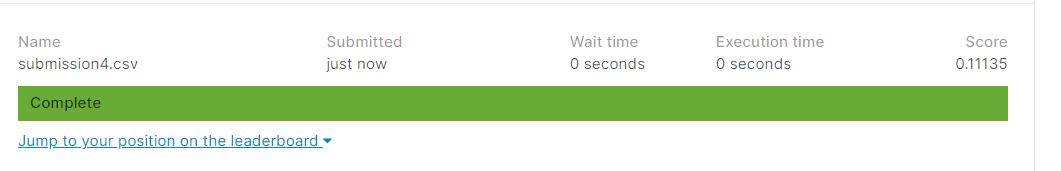